# Defining cell types by their electrophysiology

### The brain has thousands of different types of cells. How do we even begin to tease them apart?

We can define neurons by their <b>gene expression patterns</b>, <b>electrophysiology features</b>, and <b>structure</b>. Here, we'll use those three features to compare and contrast cell types in humans and mice.

This notebook will help us investigate specific features in the electrophysiology dataset from the Allen Brain Atlas.

### Before diving into this notebook:
- Complete [this first activity](https://sites.google.com/ucsd.edu/neuroedu/cell-types/web-instructions?authuser=0), which asks you to look at this data on the Allen Institute website.
- Work through [this Introduction to Jupyter Notebooks tutorial](https://github.com/ajuavinett/CellTypesLesson/blob/master/Introduction%20to%20Jupyter%20Notebooks.ipynb) which will introduce you to Python and the Jupyter Notebook environment.

If you'd like to learn a bit more coding, you should check switch to the [`CodingFocused` version of this notebook](https://github.com/ajuavinett/CellTypesLesson/blob/master/CellTypesNotebook-CodingFocused.ipynb).

### Tutorial Steps
1. [Setup our coding environment](#setup)
2. [Import Allen Cell Types Data](#import)
3. [Plot a raw sweep of data](#plotsweep)
4. [Plot the morphology of the cell](#morphology)
5. [Analyze computed metrics](#metrics)
6. [Compare action potential waveforms](#waveforms)
7. [Compare human to mouse cells](#compare)
<hr>

<a id="setup"></a>
## Step 1. Setup our coding environment
Whenever we start an analysis in Python, we need to be sure to import the necessary code packages. Below, we'll import a common selection of packages that will help us analyze and plot our data. We'll also configure the plotting in our notebook.

<div class="alert alert-success"><b>Task</b>: Just like you did in the introductory notebook, import the <a href="https://www.numpy.org/">numpy</a> toolbox nicknamed as <code>np</code>. Add a <code>print</code> message at the end that says "Packages imported!" so that you know the code ran.</div>

In [24]:
# Import our plotting package from matplotlib
import matplotlib.pyplot as plt

# Specify that all plots will happen inline & in high resolution
%matplotlib inline  
%config InlineBackend.figure_format = 'retina'

# Import pandas for working with databases
import pandas as pd

# Import numpy below


# Add your print() statement below



The Allen Institute has compiled a set of code and tools called a **Software Development Kit** (SDK). We need to make sure that you have this installed in your environment.

See [Technical Notes](#technical) at the end of this notebook for more information about working with the AllenSDK.

<div class="alert alert-success"><b>Task</b>: Run the cell below. If you receive an error, there are additional instructions on how to install the SDK locally <a href="http://alleninstitute.github.io/AllenSDK/install.html">here</a>.</div>

In [2]:
# This will ensure that the AllenSDK is installed.
try:
    import allensdk
    print('allensdk already installed')
except ImportError as e:
    !pip install allensdk

Now that we have the allensdk installed, we can `import` the CellTypesCache module. This module provides tools to allow us to get information from the Cell Types database. 

The CellTypesCache that we're importing provides tools to allow us to get information from the cell types database. We're giving it a **manifest** filename as well. CellTypesCache will create this manifest file, which contains metadata about the cache. If you want, you can look in the cell_types folder in your code directory and take a look at the file.

<div class="alert alert-success"><b>Task</b>: Run the cell below.</div>

In [3]:
#Import the "Cell Types Cache" from the AllenSDK core package
from allensdk.core.cell_types_cache import CellTypesCache

#Initialize the cache as 'ctc' (cell types cache)
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

print('CellTypesCache imported.')

CellTypesCache imported.


## Step 2. Import Cell Types data
Now that we have the module that we need, let's import a raw sweep of the data. The cell below will grab the data for the same experiment you just looked at on the website. This data is in the form of a [**Neuroscience Without Borders** (NWB)](https://www.nwb.org/) file.

<div class="alert alert-success"><b>Task</b>: Find the cell specimen ID for the first cell you looked at on the Allen Institute website (hint: it's in the URL), and assign this to <code>cell_id</code> below by replacing the <code>...</code>. Run the cell.

This might take a minute or two. You should wait until the circle in the upper right is <i>not</i> filled to continue.</div>

In [6]:
# Enter your cell_id below
cell_id = ...

# Get the electrophysiology (ephys) data for that cell
data = ctc.get_ephys_data(cell_id)
print('Data retrieved')

2020-09-25 10:27:06,482 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491198297


Data retrieved


Thankfully, our NWB file has some built-in **methods** to enable us to pull out a recording sweep. We can access methods of objects like our `data` object by adding a period, and then the method. That's what we're doing below, with `data.get_sweep()`.


<div class="alert alert-success">
    <b>Task:</b> Choose your favorite sweep below. (<u>Hint</u>: go back to the website to see what the sweep numbers are.)</div>
    
<i>Note</i>: You may get an `H5pyDeprecationWarning`, but don't worry about it. This is out of our control. :)

In [9]:
# Assign your favorite sweep number to a variable "sweep_number" below.
sweep_number = ...

sweep_data = data.get_sweep(sweep_number) 
print('Sweep obtained')

Sweep obtained


<a id="plotsweep"></a>
## Step 3. Plot a raw sweep of data
Now that you've pulled down some data, chosen a cell, and chosen a sweep number, let's plot that data.

<div class="alert alert-success"><b>Task:</b> Run the cell below!</div>

<i>Note</i>: There's a lot of code here, but don't worry about it too much. The principles are the same as in the `Introduction to Jupyter Notebooks`, except now we're plotting "subplots" -- multiple plots within one image -- so the code is a little bit more complicated.

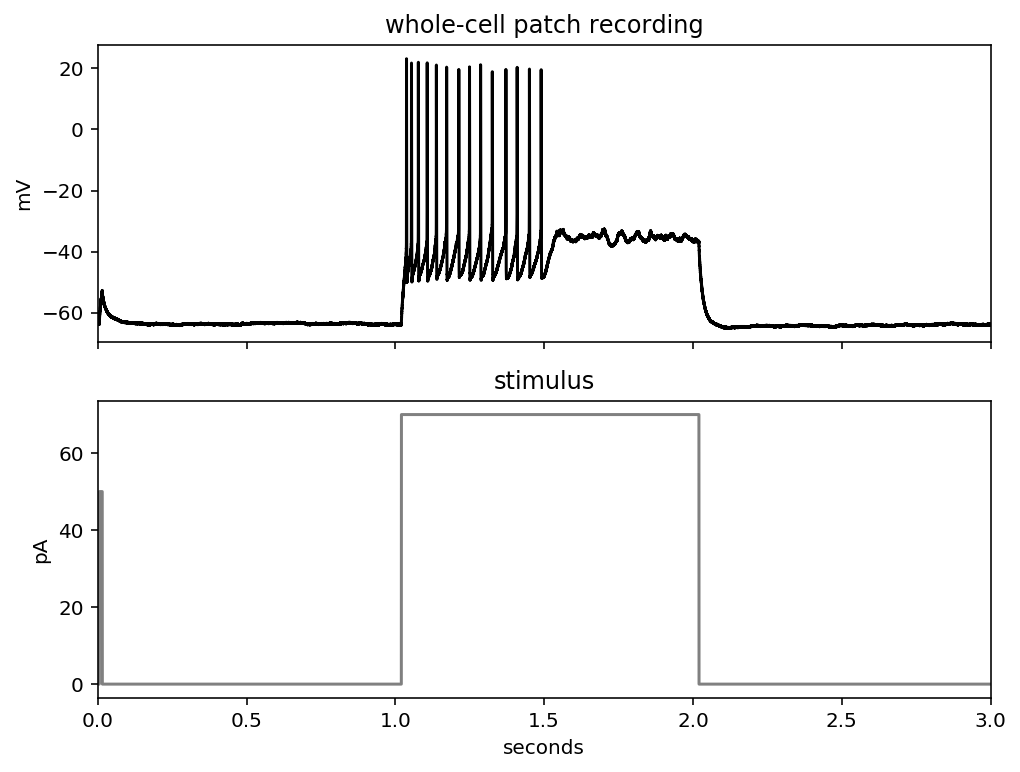

In [89]:
# Get the stimulus trace (in amps) and convert to pA
stim_current = sweep_data['stimulus'] * 1e12

# Get the voltage trace (in volts) and convert to mV
response_voltage = sweep_data['response'] * 1e3

# Get the sampling rate and can create a time axis for our data
sampling_rate = sweep_data['sampling_rate'] # in Hz
timestamps = (np.arange(0, len(response_voltage)) * (1.0 / sampling_rate))

# Set up our plot
fig, axes = plt.subplots(2, 1, sharex=True,figsize=(8,6))

# axes 0 is our first plot, of the recorded voltage data
axes[0].plot(timestamps, response_voltage, color='black')
axes[0].set_ylabel('mV')
axes[0].set_xlim(0,3) # determines the scaling of the x-axis
axes[0].set_title('whole-cell patch recording')

# axes 1 is our second plot, of the stimulus trace
axes[1].plot(timestamps, stim_current, color='gray')
axes[1].set_ylabel('pA')
axes[1].set_xlabel('seconds')
axes[1].set_title('stimulus')

plt.show()

This plot probably looks different from the plot on the website, why?

<div class="alert alert-success">
<b>Hint:</b> There is a line that has been commented out above. Uncomment the line to change the scaling of the x-axis in order to zoom in on the period where the current was applied. You can change the values within the parentheses after <code>set_xlim</code> to change the extent of the x axis. There is more documentation about this method <a href="https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xlim.html">here</a>. Re-run the cell to re-plot the data.</div>

<a id="morphology"></a>
## Step 4. Plot the morphology of the cell
The Cell Types Database also contains 3D reconstructions of neuronal morphologies. Here, we'll plot the reconstruction of our cell's morphology.

*Note*: It will take several minutes to run the cell below, possibly longer over a slow internet connection. Running this cell is optional and can be skipped if necessary.

2020-09-25 10:41:29,093 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491120375
2020-09-25 10:41:31,421 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/501275935


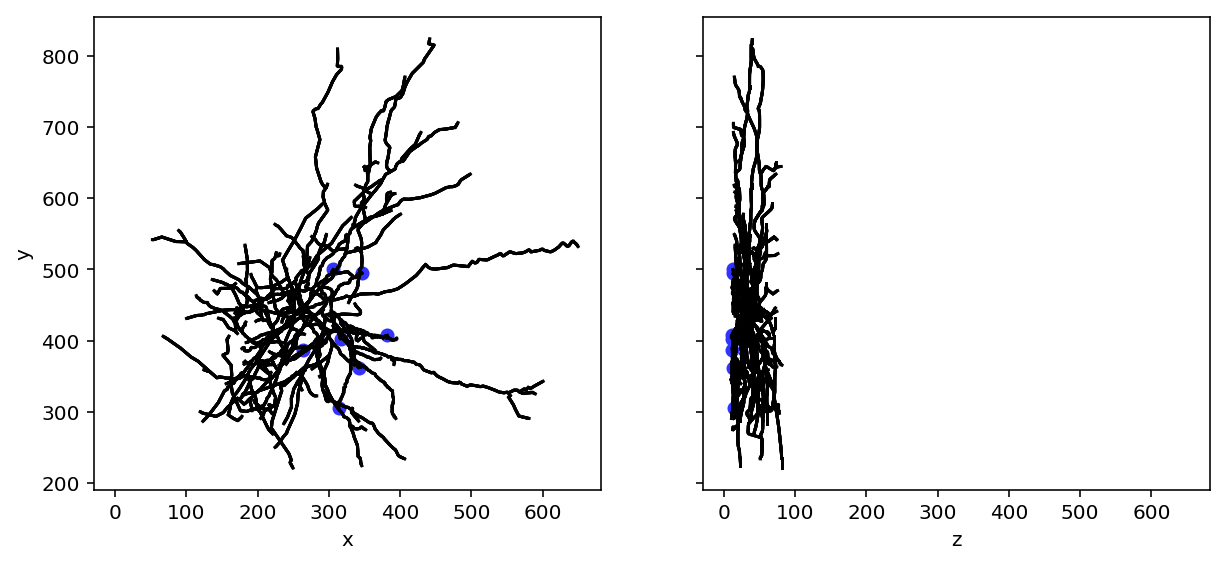

In [22]:
# Import necessary toolbox
from allensdk.core.swc import Marker

# Download and open morphology and marker files
morphology = ctc.get_reconstruction(cell_id) 
markers = ctc.get_reconstruction_markers(cell_id) 

# Set up our plot
fig, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10,10))
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

# Make a line drawing of x-y and y-z views
for n in morphology.compartment_list:
    for c in morphology.children_of(n):
        axes[0].plot([n['x'], c['x']], [n['y'], c['y']], color='black')
        axes[1].plot([n['z'], c['z']], [n['y'], c['y']], color='black')

# cut dendrite markers
dm = [ m for m in markers if m['name'] == Marker.CUT_DENDRITE ]
axes[0].scatter([m['x'] for m in dm], [m['y'] for m in dm], color='#3333ff')
axes[1].scatter([m['z'] for m in dm], [m['y'] for m in dm], color='#3333ff')

# no reconstruction markers
nm = [ m for m in markers if m['name'] == Marker.NO_RECONSTRUCTION ]
axes[0].scatter([m['x'] for m in nm], [m['y'] for m in nm], color='#333333')
axes[1].scatter([m['z'] for m in nm], [m['y'] for m in nm], color='#333333')
axes[0].set_ylabel('y')
axes[0].set_xlabel('x')
axes[1].set_xlabel('z')
plt.show()

<a id="metrics"></a>
## Step 5. Analyze computed metrics

The Cell Types Database contains a set of features that have already been computed, which could serve as good starting points for analysis. We can query the database to get these features. Below, we'll use the Pandas package that we imported above to create a **dataframe** for our data.

<div class="alert alert-success"><b>Task</b>: Run the cell below. It'll take ~10 seconds. It will print a list of all of the feature available, as well as produce a dataframe, which looks something like an excel spreadsheet. You can scroll to the right to see many of the different features available in this dataset.</div>

In [26]:
# Download all electrophysiology features for all cells
ephys_features = ctc.get_ephys_features()
ef_df = pd.DataFrame(ephys_features).set_index('specimen_id')

print('Ephys features available for %d cells:' % len(ef_df))
ef_df.head() # Just show the first 5 rows (the head) of our dataframe 

Ephys features available for 2333 cells:


,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
specimen_id,,,,,,,,,,,,,,,,,,,,,
529878215,NaN,134.700000,22.697498,8.335459e-02,1.187680,13.295200,1.025916,-56.375004,-57.385420,-57.431251,...,13.295680,1.134780,-56.593754,-57.739586,-74.143753,3.029695,3.061646,2.969821,-80.468750,-73.553391
548459652,NaN,NaN,-24.887498,-3.913630e-19,1.099840,20.650105,1.025460,-54.000000,-54.828129,-54.656254,...,20.650735,1.160940,-55.406254,-55.242191,-73.500000,2.441895,2.245653,2.231575,-84.406258,-73.056595
579978640,0.009770,39.044800,-46.765002,5.267857e-01,1.157840,2.551310,1.025387,-59.500000,-58.234378,-59.940975,...,2.551960,1.089851,-60.062500,-58.570314,-61.371531,2.023762,2.162878,2.006406,-93.375008,-60.277321
439024551,-0.007898,117.816429,5.996250,1.542553e-01,1.989165,9.572025,1.028733,-47.531250,-50.359375,-65.500000,...,9.576308,1.423229,-49.406254,-52.718752,-75.273443,3.105931,3.491663,1.733896,-87.656250,-75.205559
515188639,0.022842,68.321429,14.910000,1.714041e-01,1.081980,2.462880,1.025620,-48.437504,-46.520837,-51.406253,...,2.490433,1.479690,-53.000004,-54.645837,-64.250003,3.285760,3.363504,4.234701,-81.625008,-63.474991


There are a lot of computed features here. [Here's a glossary](https://docs.google.com/document/d/1YGLwkMTebwrXd_1E817LFbztMjSTCWh83Mlp3_3ZMEo/edit?usp=sharing), in case you're curious.

![](https://github.com/ajuavinett/CellTypesLesson/blob/master/docs/ap_features.png?raw=true)
Image from the <a href="http://help.brain-map.org/download/attachments/8323525/CellTypes_Ephys_Overview.pdf">Allen Institute Cell Types Database Technical Whitepaper.</a>
<br><br>
Let's first look at the speed of the trough, and the ratio between the upstroke and downstroke of the action potential.

<div style="background: #F3D48D; border-radius: 3px; padding: 10px;">
<b>Action potential fast trough (fast_trough_v_long_square)</b>: Minimum value of the membrane potential in the interval lasting 5 ms after the peak.

<b>Upstroke/downstroke ratio (upstroke_downstroke_ratio_long_square)</b>: The ratio between the absolute values of the action potential peak upstroke and the action potential peak downstroke.</div> 

Below, we'll plot the values of the trough vs. the upstroke-downstroke ratio in a scatterplot.

<div class="alert alert-success"><b>Task</b>: Run the cell below.</div>

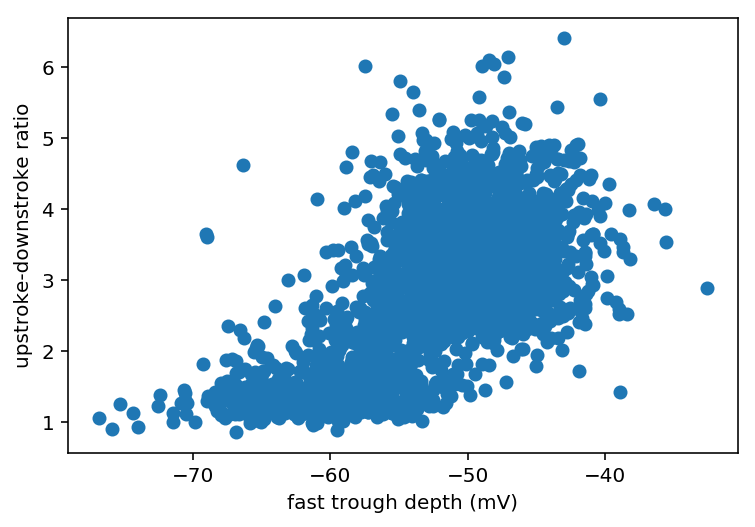

In [27]:
plt.scatter(ef_df['fast_trough_v_long_square'], 
            ef_df['upstroke_downstroke_ratio_long_square'])
plt.ylabel("upstroke-downstroke ratio")
plt.xlabel("fast trough depth (mV)")
plt.show()

It looks like there may be roughly two clusters in the data above. Maybe they relate to whether the cells are presumably excitatory (spiny) cells or inhibitory (aspiny) cells. Let's query the API and split up the two sets to see.

<div class="alert alert-success">
<b>Task:</b> The cell below will dig up the dendrite type of these cells and add that to our dataframe. Then, it'll create our same scatterplot, where each dot is colored by dendrite type. All you need to do is run the cell! Right click to save the image as 'scatterplot.png' once it generates.</div>

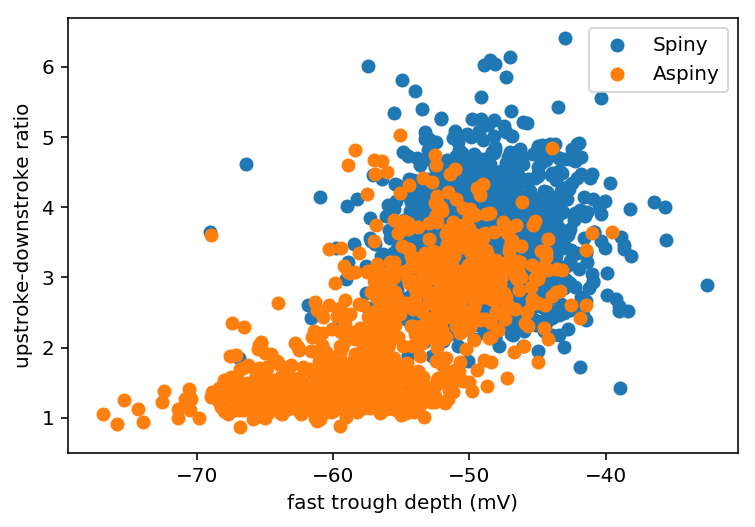

In [108]:
# Get information about our cells' dendrites
cells = ctc.get_cells()
ef_df_dendrites = ef_df.join(pd.DataFrame(cells).set_index('id'))

# Create a dataframe for spiny cells, and a dataframe for aspiny cells
spiny_df = ef_df_dendrites[ef_df_dendrites['dendrite_type'] == 'spiny']
aspiny_df = ef_df_dendrites[ef_df_dendrites['dendrite_type'] == 'aspiny']

# Create our plot! Calling scatter twice like this will draw both of these on the same plot.
plt.scatter(spiny_df['fast_trough_v_long_square'],spiny_df['upstroke_downstroke_ratio_long_square'])
plt.scatter(aspiny_df['fast_trough_v_long_square'],aspiny_df['upstroke_downstroke_ratio_long_square'])

plt.ylabel("upstroke-downstroke ratio")
plt.xlabel("fast trough depth (mV)")
plt.legend(['Spiny','Aspiny'])
    
plt.show()

Looks like these two clusters do partially relate to the dendritic type. Cells with spiny dendrites (which are typically excitatory cells) have a big ratio of upstroke:downstroke, and a more shallow trough (less negative). Cells with aspiny dendrites (typically inhibitory cells) are a little bit more varied. But </i>only</i> aspiny cells have a low upstroke:downstroke ratio and a deeper trough (more negative).

<a id="waveforms"></a>

## Step 6. Compare waveforms
Let's take a closer look at the action potentials of these cells to see what these metrics actually mean for the action potential waveform by choosing one of the cells with the highest upstroke:downstroke ratio.

<div class="alert alert-success"><b>Task</b>: Run the cell below. The first line will sort our dataframe so that it's descending (<code>ascending=False</code>) based on upstroke:downstroke ratio
</div>

In [82]:
# Sort the dataframe and reassign
ef_df_upstroke_sorted = ef_df.sort_values('upstroke_downstroke_ratio_long_square',ascending=False)

# Assign one of the top cells in our dataframe (default = 2) and the ratio to different variables
specimen_id = ef_df_upstroke_sorted.index[2]
ratio = ef_df_upstroke_sorted.iloc[2]['upstroke_downstroke_ratio_long_square']

# Print our results so that we can see them
print('Specimen ID: ' + str(specimen_id) + ' with upstroke-downstroke ratio: ' + str(ratio))

Specimen ID: 510106222 with upstroke-downstroke ratio: 6.096556072935241


Now we can take a closer look at the action potential for that cell by grabbing a raw sweep of recording from it, just like we did above.

<div class="alert alert-success"><b>Task:</b> Run the cell below. This may take a minute or so.</div>

In [83]:
# Get the data for our specimen
upstroke_data = ctc.get_ephys_data(specimen_id)

# Get one sweep for our specimen (I've already handselected a gorgeous one for you, 45)
upstroke_sweep = upstroke_data.get_sweep(45) 

# Get the current & voltage traces
current = upstroke_sweep['stimulus'] * 1e12 # in A, converted to pA
voltage = upstroke_sweep['response'] * 1e3 # converted to mV!

# Get the time stamps for our voltage trace
timestamps = (np.arange(0, len(voltage)) * (1.0 / upstroke_sweep['sampling_rate']))

print('Sweep obtained')

Sweep obtained


And now let's plot our sweep. You may need to change some values in the plotting script to actually zoom in on the action potential, or change the sweep number (set to 45 by default) to one where you can see an action potential.

<div class="alert alert-success"><b>Task</b>: Modify the plotting script below so that you can actually see the shape of the action potential, and then run. <i>Hint</i>: Check out how we did this for the raw traces above.  Right click to save your image as 'high_upstroke.png' when you're content with it.</div></div>

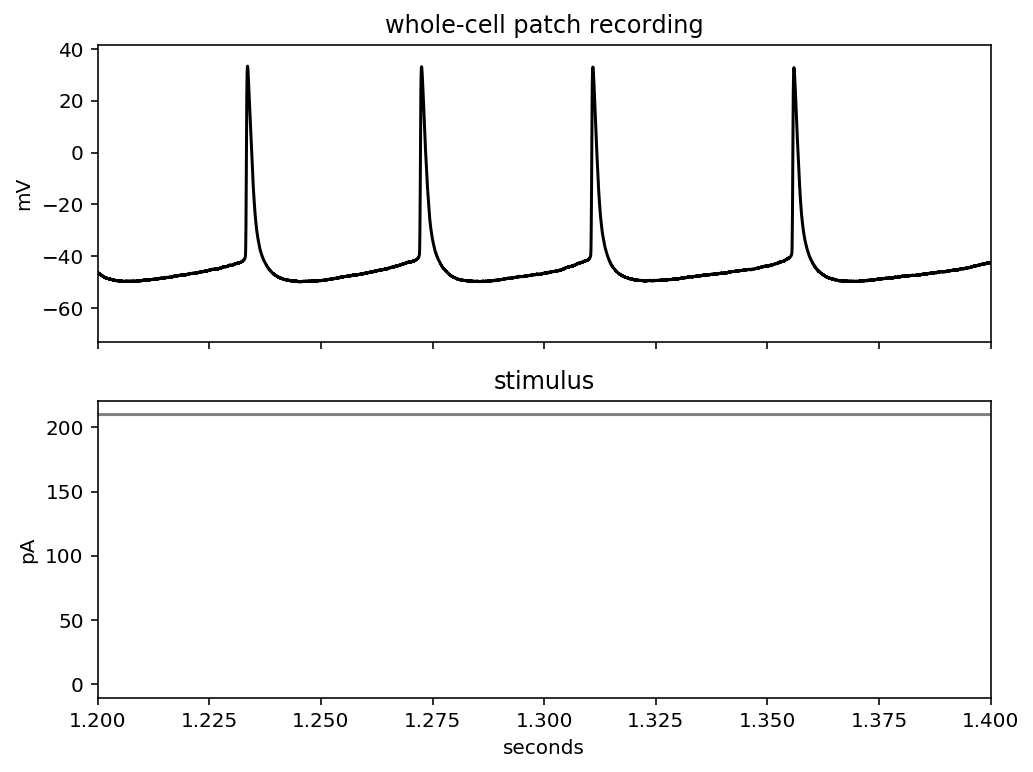

In [84]:
fig, axes = plt.subplots(2,1,figsize=(8,6),sharex=True)

# axes 0 is our first plot, of the recorded voltage data
axes[0].plot(timestamps, voltage, color='black')
axes[0].set_ylabel('mV')
axes[0].set_title('whole-cell patch recording')

#axes 1 is our second plot, of the stimulus trace
axes[1].plot(timestamps, current, color='gray')
axes[1].set_ylabel('pA')
axes[1].set_xlabel('seconds')
axes[1].set_title('stimulus')

plt.show()

Let's do the same thing for a cell with a low upstroke ratio and compare. 

<div class="alert alert-success"><b>Task:</b> Edit the line several blocks above that assigns the variable <code>ef_df_upstroke_sorted</code>. Where it says <code>ascending=</code>, set it to <code>True</code>, instead of <code>False</code>. Once you do that, re-run that cell and the cells below to re-plot the data for a new cell with a <i>low</i> upstroke-downstroke ratio. Right click to save your image as 'low_upstrokeratio.png' when you're done.</div>

As you can see, even that one metric, upstroke:downstroke ratio, means the shape of the action potential is dramatically different. The other metric above, size of the trough, is highly correlated with upstroke:downstroke. You can see that by comparing the two cells here. Cells with high upstroke:downstroke tend to have less negative troughs (undershoots) after the action potential.

<a id="compare"></a>

## Step 7. Comparing human to mouse cells
Let's get out of the action potential weeds a bit. What if we want to know a big picture thing, such as <b>are human cells different than mouse cells?</b>
    
We can make similar plots to above but subselected for human and mouse cells. First, let's get an idea of how many cells of each type are here.

In [85]:
# Import one more module
from allensdk.api.queries.cell_types_api import CellTypesApi

# download all cells
cells = ctc.get_cells()
print("Total cells: %d" % len(cells))
# mouse cells
cells = ctc.get_cells(species=[CellTypesApi.MOUSE])
print("Mouse cells: %d" % len(cells))
# human cells
cells = ctc.get_cells(species=[CellTypesApi.HUMAN])
print("Human cells: %d" % len(cells))

Total cells: 2333
Mouse cells: 1920
Human cells: 413


Let's now get all of the electrophysiology data for the mouse and human cells, separately.

In [92]:
# make a dataframe out of ephys features
ephys_features_df = pd.DataFrame.from_records(ephys_features)

# grab mouse data and merge with dataframe
mouse_df = pd.DataFrame(ctc.get_cells(species=[CellTypesApi.MOUSE]))
mouse_ephys_df = pd.merge(mouse_df,ephys_features_df,left_on='id',right_on='specimen_id',how='left')

# grab human data and merge with dataframe
human_df = pd.DataFrame(ctc.get_cells(species=[CellTypesApi.HUMAN]))
human_ephys_df = pd.merge(human_df,ephys_features_df,left_on='id',right_on='specimen_id',how='left')

# Show the first five rows of the human dataframe
human_ephys_df.head()

,reporter_status,cell_soma_location,species,id_x,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
0,None,"[273.0, 354.0, 216.0]",Homo Sapiens,525011903,H16.03.003.01.14.02,3,12113,FroL,,spiny,...,4.134987,1.375253,-53.968754,-59.510420,-71.197919,2.895461,2.559876,3.099787,-88.843758,-70.561035
1,None,"[69.0, 254.0, 96.0]",Homo Sapiens,528642047,H16.06.009.01.02.06.05,5,12141,MTG,,aspiny,...,NaN,1.051160,-67.468758,NaN,-70.875002,1.891881,NaN,1.989616,-101.000000,-69.209610
2,None,"[322.0, 255.0, 92.0]",Homo Sapiens,537256313,H16.03.006.01.05.02,4,12141,MTG,,spiny,...,5.694547,1.389900,-52.125004,-51.520836,-72.900002,3.121182,3.464528,3.054681,-87.531250,-72.628105
3,None,"[79.0, 273.0, 91.0]",Homo Sapiens,519832676,H16.03.001.01.09.01,3,12141,MTG,,spiny,...,9.962780,1.211020,-53.875004,-52.416668,-73.693753,4.574865,3.817988,4.980603,-84.218758,-72.547661
4,None,"[66.0, 220.0, 105.0]",Homo Sapiens,596020931,H17.06.009.11.04.02,4,12141,MTG,,aspiny,...,14.667340,1.336668,-63.593754,-63.239583,-75.518753,1.452890,1.441754,1.556087,-82.531250,-74.260269


Let's start by plotting a distribution of the recorded resting membrane potential (`vrest`) for all of our human cells vs all of our mouse cells. Note that the distribution is normalized by the total count, since there are many more mouse cells than human cells in our dataset. Look through the [`plt.hist()` documentation](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html) for more information.

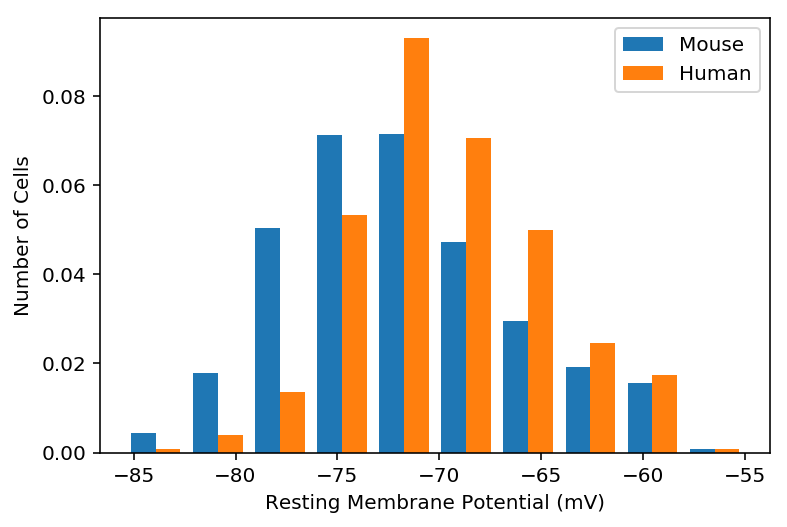

In [105]:
plt.figure()

# Change your parameter below. Make sure this matches the names in the list you generated above!
parameter = 'vrest'

# Plot the histogram, with density = True 
plt.hist([mouse_ephys_df[parameter],human_ephys_df[parameter]],density = True)

# Change the x label below:
plt.xlabel('Resting Membrane Potential (mV)')
plt.ylabel('Number of Cells')
plt.legend(['Mouse','Human'])
plt.show()

<div class="alert alert-success"> <b>Task</b>: Choose a different parameter to compare between human and mouse cells, and rerun the plot above. Use the documentation below to get the exact name of the parameter (in parentheses), and change the x label axis so that we know what you're plotting.  Right click to save your image when you're done.</div></div>

Here are a few additional metrics you might consider comparing (you can find a complete glossary [here](https://docs.google.com/document/d/1YGLwkMTebwrXd_1E817LFbztMjSTCWh83Mlp3_3ZMEo/edit?usp=sharing):

<div style="background: #F3D48D; border-radius: 3px; padding: 10px;">
<b>Tau (<code>tau</code>)</b>: time constant of the membrane in milliseconds
    
<b>Adapation ratio (<code>adaptation</code>)</b>: The rate at which firing speeds up or slows down during a stimulus<br>
    
<b>Average ISI (<code>avg_isi</code>)</b>: The mean value of all interspike intervals in a sweep<br>
    
<b>Voltage of after-hyperpolarization (<code>trough_v_short_square</code>)</b>: minimum value of the membrane potential during the after-hyperpolarization</div>
    

### Subselect for spiny or aspiny cells.
Final step for today! The histogram above is for <i>all cell types</i>, which is a really hetergenous bunch.

What happens if we subselect our human and mouse cells to be just spiny, or just aspiny? Will those types be more different in humans and mice?

<div class="alert alert-success"><b>Task</b>: Decide whether you want to look at spiny or aspiny cells by setting cell_type to either <code>spiny</code> or <code>aspiny</code> below. The value of your variable needs to be a <b>string</b> -- in other words, it should have quotes around it.</div>

Number of human spiny cells: 321
Number of mouse spiny cells: 892


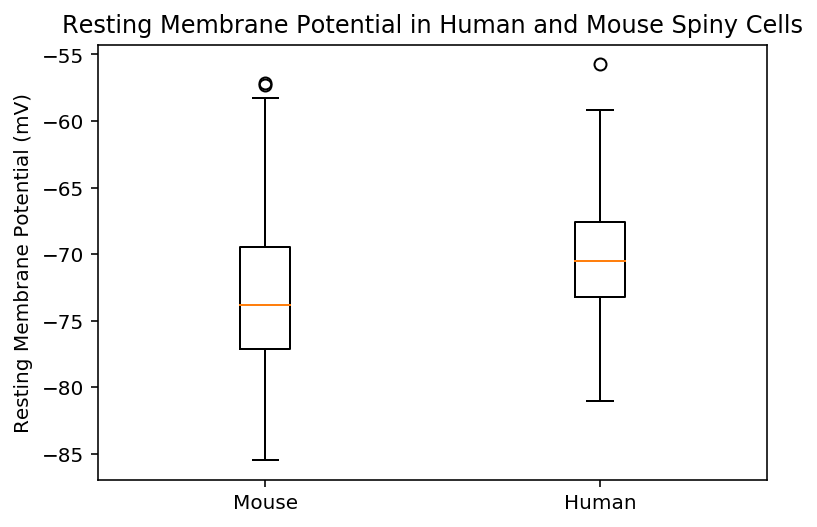

In [127]:
cell_type = ...

human = human_ephys_df[human_ephys_df['dendrite_type']== cell_type]
mouse = mouse_ephys_df[mouse_ephys_df['dendrite_type']== cell_type]
print('Number of human ' + cell_type + ' cells: %d' % len(human))
print('Number of mouse ' + cell_type + ' cells: %d' % len(mouse))

plt.hist([mouse[parameter],human[parameter]],density=True)
plt.xlabel('Resting Membrane Potential (mV)') #x-axis label
plt.ylabel('Number of Cells')
plt.legend(['mouse','human'])

# Boxplot creation lines below
#plt.boxplot([mouse[parameter],human[parameter]])
#plt.ylabel('Resting Membrane Potential (mV)') # y-axis label
#plt.xticks([1, 2], ['Mouse','Human'])

# Plot title -- be sure to update!
plt.title('Resting Membrane Potential in Human and Mouse Spiny Cells')

plt.show()

<div class="alert alert-success"><b>Task</b>: It's a little hard to see the population differences here, so let's plot it as a boxplot. <b>Comment</b> out the lines for the histogram (add a <code>#</code> and <b><i>uncomment</b></i> the four lines below. Re-run the code to get a boxplot of the data.

Change the feature here to whatever feature you created and saved a histogram for above. Right click to save your image when you're done.</div>

That's it for today -- great work!

In [ ]:
from IPython.display import HTML
print('Nice work!')
HTML('<img src="https://media.giphy.com/media/xUOwGhOrYP0jP6iAy4/giphy.gif">')

<hr>
<a id="technical"></a>

### Technical notes & credits

This notebook demonstrates most of the features of the AllenSDK that help manipulate data in the Cell Types Database.  The main entry point will be through the `CellTypesCache` class. `CellTypesCache` is responsible for downloading Cell Types Database data to a standard directory structure on your hard drive.  If you use this class, you will not have to keep track of where your data lives, other than a root directory.

Much more information can be found in the <a href="http://help.brain-map.org/download/attachments/8323525/CellTypes_Ephys_Overview.pdf">Allen Brain Atlas whitepaper</a> as well as in their <a href="http://alleninstitute.github.io/AllenSDK/cell_types.html">GitHub documentation</a>.

This notebook was largely inspired by <a href='https://alleninstitute.github.io/AllenSDK/_static/examples/nb/cell_types.html'>this</a> notebook.